# Applied learning task 2: Analytics


[Strand 3: task 2 ](https://curriculumonline.ie/Senior-Cycle/Senior-Cycle-Subjects/Computer-Science/Strands-and-learning-outcomes/)



Hypothesising, making predictions, examining evidence, recognising patterns and reaching conclusions are at the heart of computer science. In this applied learning task, students will identify an interdisciplinary topic, develop a hypothesis and utilise existing resources to highlight the salient information and inform future decisions. By identifying, analysing, and deconstructing a problem, students will deepen their understanding of practices and principles of computer science.


| Students learn about              | Students should be able to                                                    |
|-----------------------------------|------------------------------------------------------------------------------|
| Analytics; Abstraction            | Develop algorithms that can find the frequency, mean, median and mode of a data set |
| Data collection and analysis      | Structure and transform raw data to prepare it for analysis                  |
| Interpretation of data            | Represent data to effectively communicate in a graphical form                |
| Algorithms                        | Use algorithms to analyze and interpret data in a way that informs decision-making |

Carat is a unit of measurement used to describe the weight of a diamond or other gemstones. One carat is equal to 200 milligrams or 0.007 ounces. It is commonly used to determine the size and value of a diamond, with larger diamonds generally being more valuable than smaller ones. The density of diamond is around 3.5 grams per cubic centimeter (g/cm³).

In [155]:
200/3.5


57.142857142857146

##  Analytics - Load required libraries

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import plotly.graph_objects as go
import numpy as np
import seaborn as sns

"""Note these lines of code will often be repeated later 
to aid teaching and learnign and to 
allow for editing of data and headers within the cell and tested
despite the increased computational load"""

'Note these lines of code will often be repeated later \nto aid teaching and learnign and to \nallow for editing of data and headers within the cell and tested\ndespite the increased computational load'

In [82]:
# Load the "diamonds" dataset
df = sns.load_dataset('diamonds')

# Display the first few rows of the dataset
print(df.shape)
print(df.dtypes)
df.head()

(53940, 10)
carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


##  Data collection and analysis      

Structure and transform raw data to prepare it for analysis

The dataset contains information on the physical characteristics and price of approximately 53, 940 diamonds. The data is  ** secondary data **   collected by measuring and categorising each diamond and  recording its selling price.

The dataset consists of 10 columns of which three are categorical and the rest numerical.  



Categorical variables  cut, color, and clarity are studied using boxplots to visualise their impact on the  price of the diamonds.


The numerical columns include depth, table, and the dimensions of the diamond (x, y, z), which may be used to calculate additional physical characteristics such as volume.

Analysis is carried out on the categorical data cut, color, and clarity first and then the numerical data is analysed.

There were no missing values, and that the data types for each column are appropriate so no renaming was required. Further analysis of the data may involve studying the relationships between the various physical characteristics and the corresponding price of the diamond. 



### Categorical data and price retained using   the loc method keeps selected columns


To keep only the columns for  "cut", "color", "clarity" and "price" in the "diamonds" dataset using Pandas, we use the loc method below and then we check that there is no missing data:

In [83]:
import seaborn as sns

# Load the "diamonds" dataset
df = sns.load_dataset('diamonds')

# Keep only selected columns
df = df.loc[:, ['cut', 'color', 'clarity', 'price']]

# Display the first few rows of the modified dataset
df.head()

,cut,color,clarity,price
0,Ideal,E,SI2,326
1,Premium,E,SI1,326
2,Good,E,VS1,327
3,Premium,I,VS2,334
4,Good,J,SI2,335


These lines of code check for the number of missing values in each column of the given dataframe 'df', where 'cut', 'color', 'clarity', and 'price' are column names. The ".isnull()" method is used to create a boolean mask where 'True' represents a missing value and 'False' represents a non-missing value. The ".sum()" method is then used to sum up all the 'True' values in the boolean mask, giving the total number of missing values in that column.

In [84]:
print(df['cut'].isnull().sum())
print(df['color'].isnull().sum())
print(df['clarity'].isnull().sum())
print(df['price'].isnull().sum())

0
0
0
0


This method checks for missing data in all columns of the dataset at once, rather than checking each column separately as in the previous method. One advantage of this method is that it allows for a quick and comprehensive check for missing data in the entire dataset. However, one disadvantage is that it assumes that missing data is represented as "NaN", which may not always be the case.

In [85]:
# Check for missing data
missing = df.isnull().sum()

# Display the result
print(missing)

cut        0
color      0
clarity    0
price      0
dtype: int64


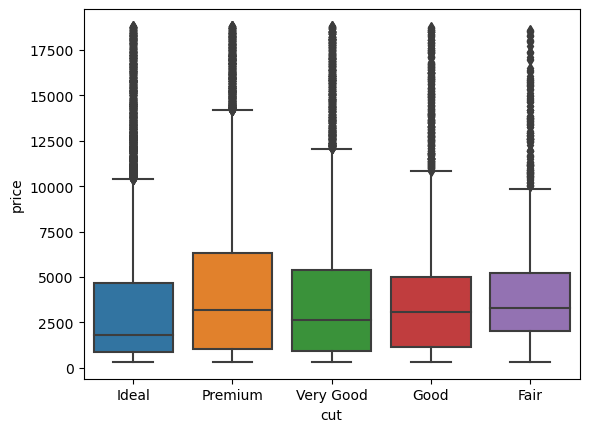

In [86]:
sns.boxplot(x='cut', y='price', data=df)
plt.show()

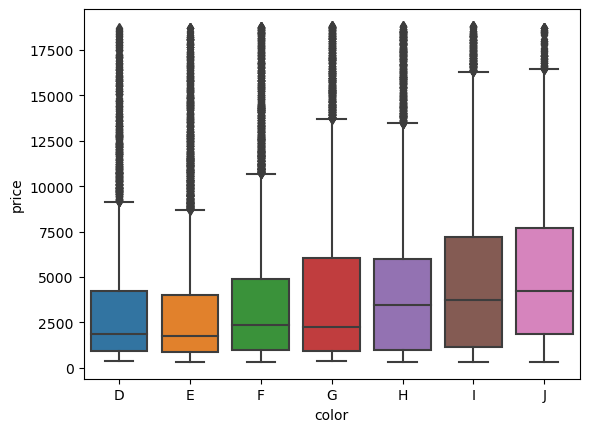

In [87]:
sns.boxplot(x='color', y='price', data=df)
plt.show()

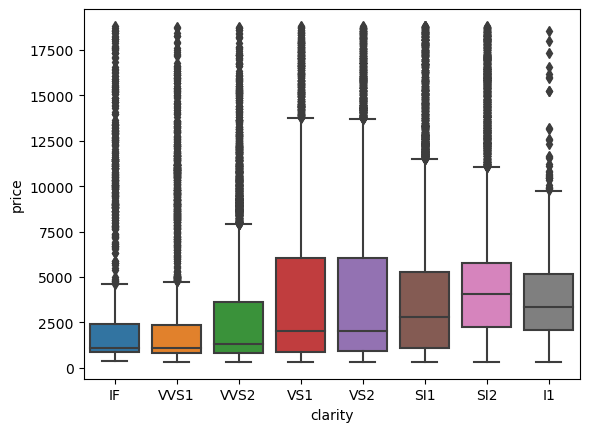

In [88]:
sns.boxplot(x='clarity', y='price', data=df)
plt.show()

In [89]:
# Create a subset of the DataFrame with only "premium" clarity
df_premium = df[df['cut'] == 'Premium']

# Calculate mean, mode, and median of "price" for the "premium" clarity level
mean_price = stats.mean(df_premium['price'])
mode_price = stats.mode(df_premium['price'])
median_price = stats.median(df_premium['price'])

# Display the results
print('Mean price for "premium" cut:', mean_price)
print('Mode price for "premium" cut:', mode_price)
print('Median price for "premium" cut:', median_price)


Mean price for "premium" cut: 4584.2577042999055
Mode price for "premium" cut: 802
Median price for "premium" cut: 3185


In [90]:
import seaborn as sns

# Load the "diamonds" dataset
df = sns.load_dataset('diamonds')


# Drop unwanted columns
df = df.drop(columns=['cut', 'color', 'clarity'])

# Display the first few rows of the modified dataset
df.head()


,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [91]:
# Calculate mean, mode, and median of "price"
mean_price = stats.mean(df['price'])
mode_price = stats.mode(df['price'])
median_price = stats.median(df['price'])

# Display the results
print('Mean price:', mean_price)
print('Mode price:', mode_price)
print('Median price:', median_price)

Mean price: 3932.799721913237
Mode price: 605
Median price: 2401.0


In [92]:
round((3185-2401)/24.01,0)

33.0

## Premium cut diamonds have a median price 33% higher than the median of all the diamonds

## Describtive and visual methods of finding stongest correlation


In the diamonds dataset, x, y, and z represent the measurements of a diamond in millimeters. Specifically:

x: Length of the diamond in mm
y: Width of the diamond in mm
z: Depth of the diamond in mm
These measurements are used to calculate the carat weight of the diamond.

Nevertheless it is interesting to add an xyz volume column and see if it correlates the same as carat!





### corr = df.corr() Fastest method


In [93]:
# Load the "diamonds" dataset
df = sns.load_dataset('diamonds')
# Create the new feature "xyz" as the product of "x", "y", and "z" columns
df['xyz'] = df['x'] * df['y'] * df['z']
# Drop categorical data columns
df = df.drop(columns=['cut', 'color', 'clarity'])
# Move "price" column to the front
price_col = df.pop('price')
df.insert(0, 'price', price_col)

# Display the modified dataframe


print(df.columns)
print(df.isnull().sum())
print(df.dtypes)
print(df.head())

Index(['price', 'carat', 'depth', 'table', 'x', 'y', 'z', 'xyz'], dtype='object')
price    0
carat    0
depth    0
table    0
x        0
y        0
z        0
xyz      0
dtype: int64
price      int64
carat    float64
depth    float64
table    float64
x        float64
y        float64
z        float64
xyz      float64
dtype: object
   price  carat  depth  table     x     y     z        xyz
0    326   0.23   61.5   55.0  3.95  3.98  2.43  38.202030
1    326   0.21   59.8   61.0  3.89  3.84  2.31  34.505856
2    327   0.23   56.9   65.0  4.05  4.07  2.31  38.076885
3    334   0.29   62.4   58.0  4.20  4.23  2.63  46.724580
4    335   0.31   63.3   58.0  4.34  4.35  2.75  51.917250


In [94]:
# Calculate the correlations between all pairs of variables
corr = df.corr()

# Display the correlation matrix
print(corr)



          price     carat     depth     table         x         y         z  \
price  1.000000  0.921591 -0.010647  0.127134  0.884435  0.865421  0.861249   
carat  0.921591  1.000000  0.028224  0.181618  0.975094  0.951722  0.953387   
depth -0.010647  0.028224  1.000000 -0.295779 -0.025289 -0.029341  0.094924   
table  0.127134  0.181618 -0.295779  1.000000  0.195344  0.183760  0.150929   
x      0.884435  0.975094 -0.025289  0.195344  1.000000  0.974701  0.970772   
y      0.865421  0.951722 -0.029341  0.183760  0.974701  1.000000  0.952006   
z      0.861249  0.953387  0.094924  0.150929  0.970772  0.952006  1.000000   
xyz    0.902385  0.976308  0.009157  0.167400  0.956564  0.975143  0.950065   

            xyz  
price  0.902385  
carat  0.976308  
depth  0.009157  
table  0.167400  
x      0.956564  
y      0.975143  
z      0.950065  
xyz    1.000000  


### sns.pairplot(df) shows scatterplots and histograms

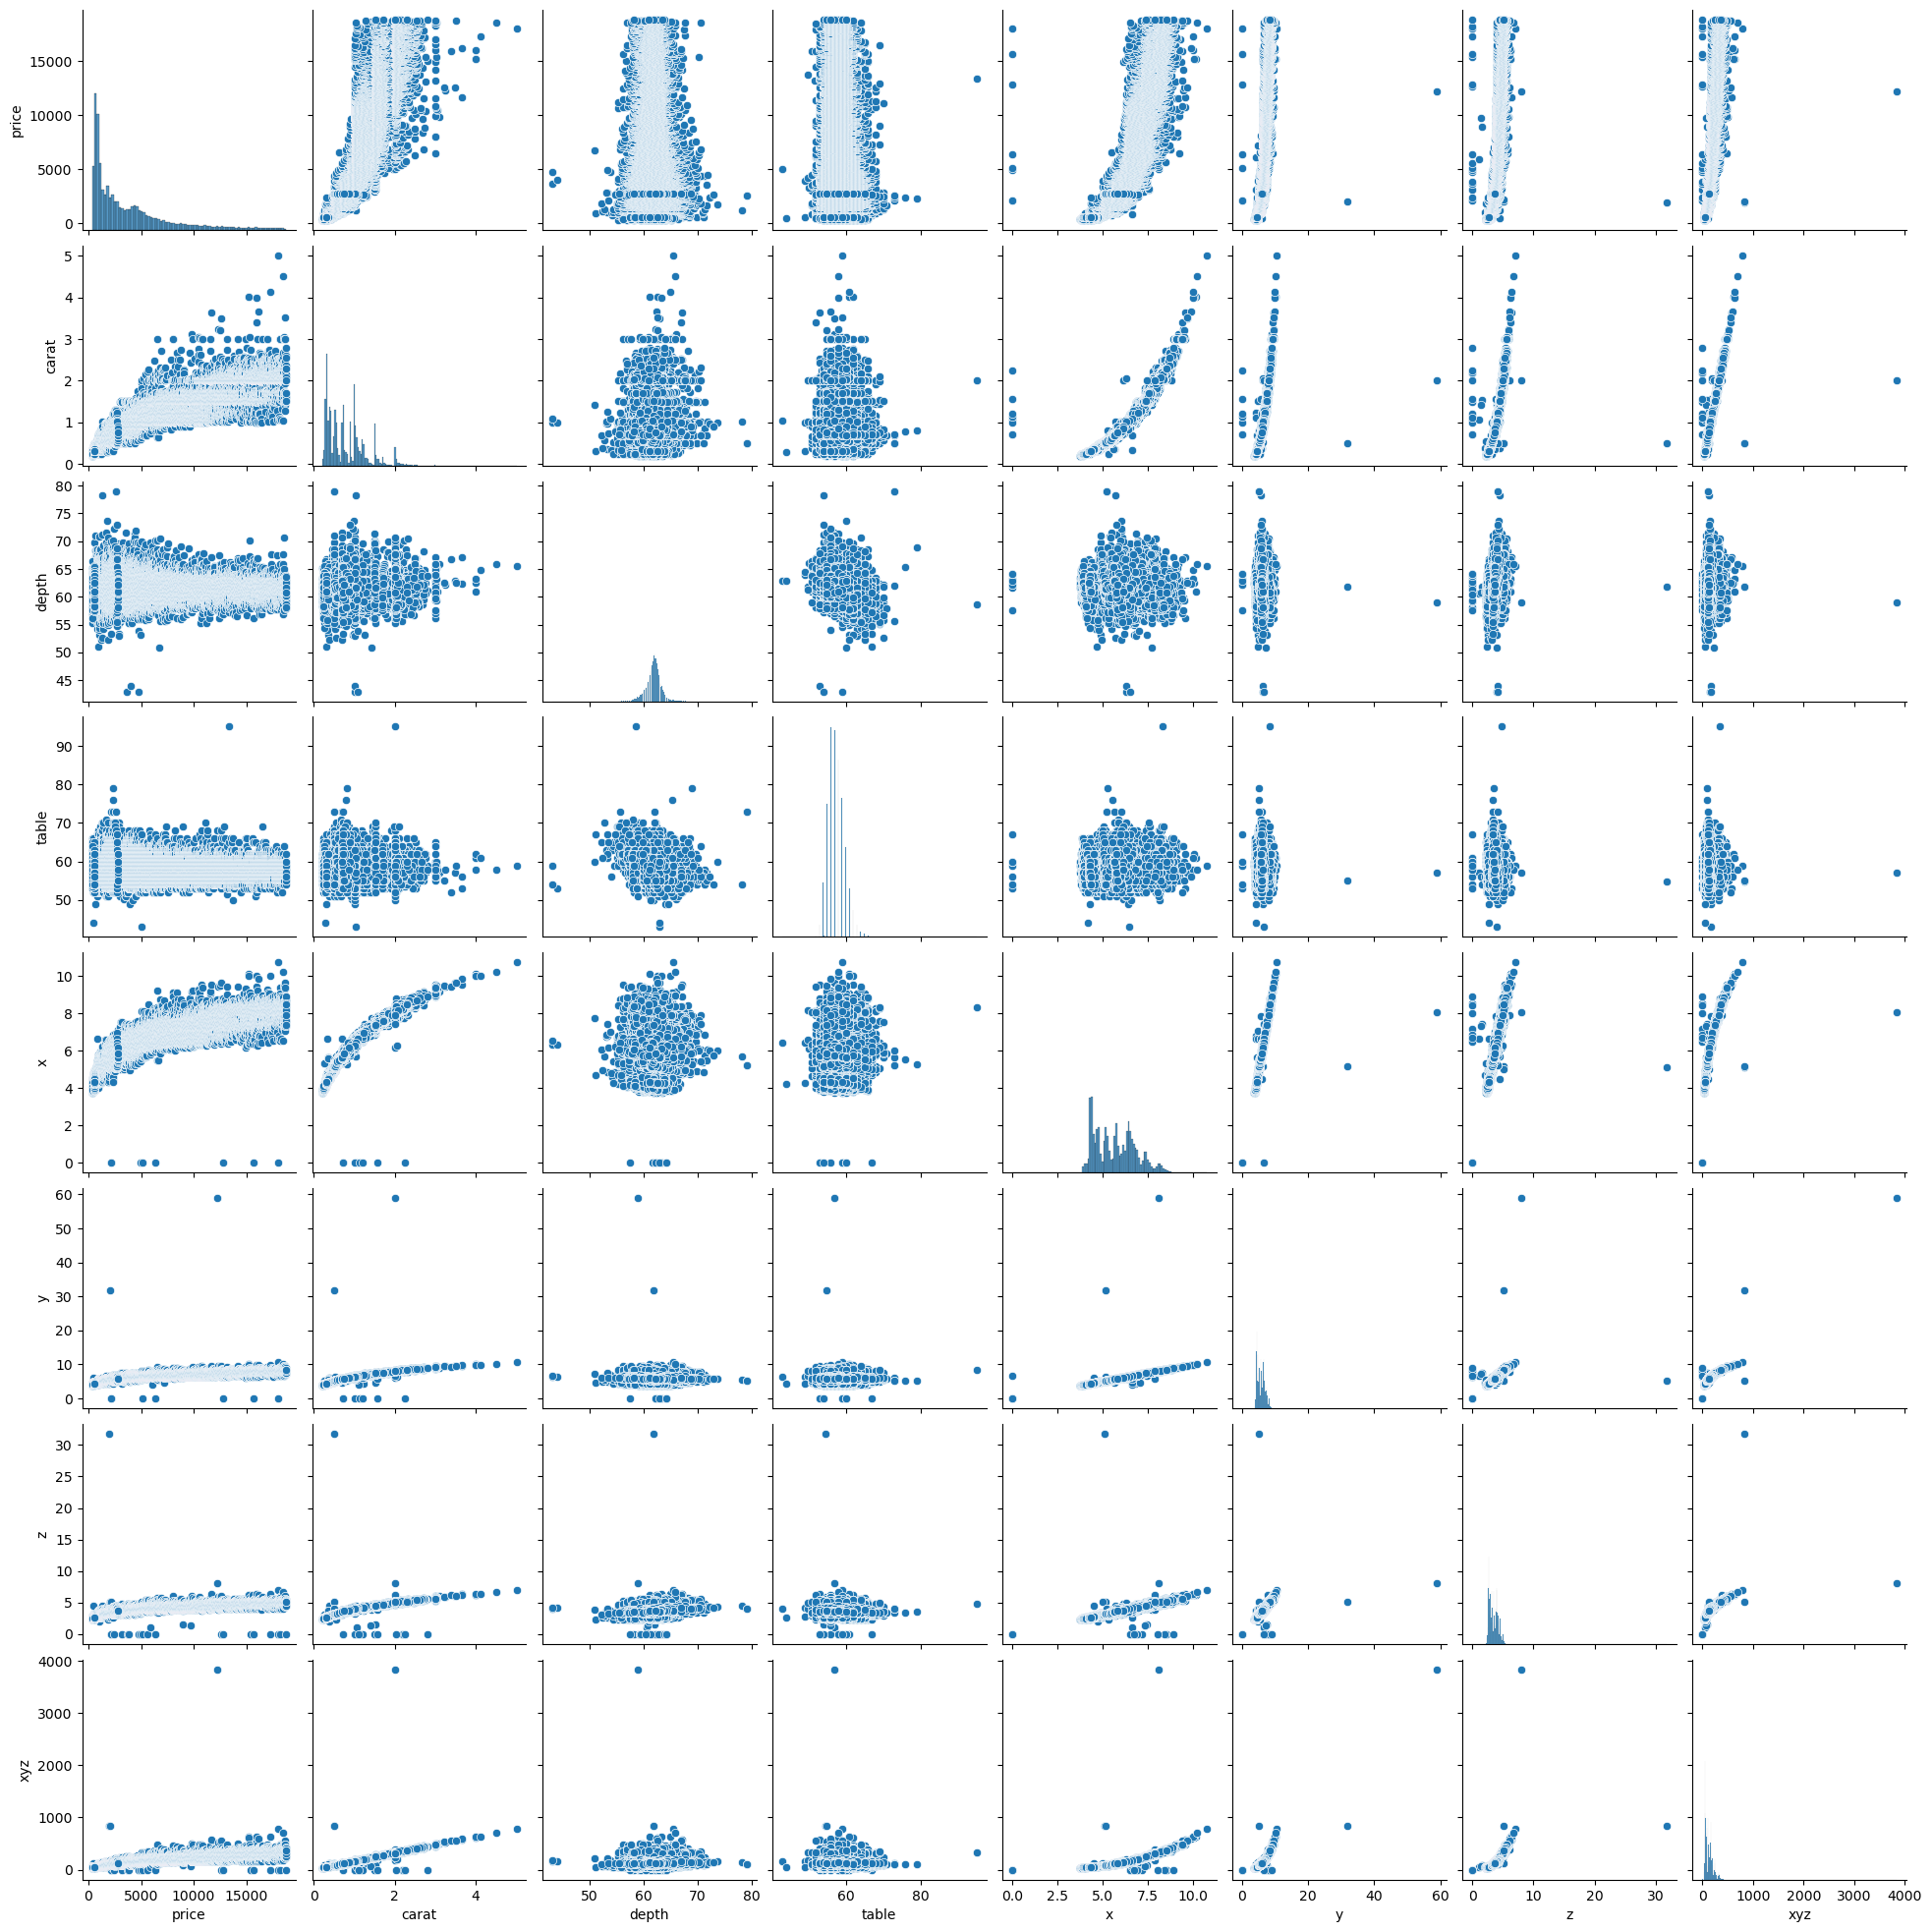

In [95]:
# Create pairwise plots
sns.pairplot(df)
# Show the plot
plt.show()

In this code below , the lmplot() function is used to create a scatterplot with a line of best fit for "carat" and "xyz" in the modified "diamonds" dataset. The resulting scatter plot is displayed using the show() method and has very **sparse data** to the upper right. Outliers are removed further analysis and data transformation takes place below.

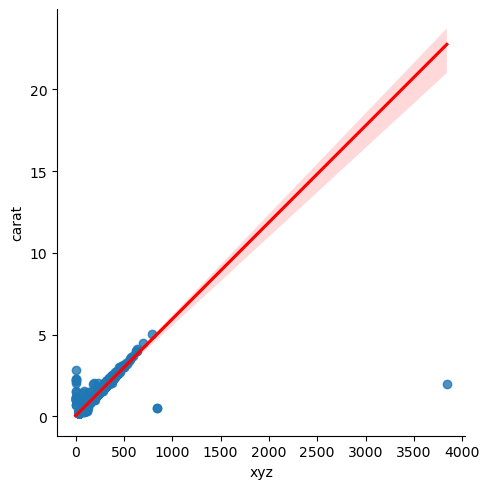

In [164]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import seaborn as sns

# Load the "diamonds" dataset
df = sns.load_dataset('diamonds')
# Create the new feature "xyz" as the product of "x", "y", and "z" columns
df['xyz'] = df['x'] * df['y'] * df['z']
# Drop categorical data columns
df = df.drop(columns=['cut', 'color', 'clarity'])
# Move "price" column to the front
price_col = df.pop('price')
df.insert(0, 'price', price_col)
# Create scatterplot with line of best fit and equation
sns.lmplot(x='xyz', y='carat', data=df, line_kws={'color': 'red'})
# Display the plot
plt.show()



## np.sort(df['xyz'].unique())

A visual inspection shows two obvious outliers below the data

But also there is a possible problem with very low or zero xyz values that needs to be zoomed in on

or detected with  np.sort(df['xyz'].unique())

In [168]:

# return a list of unique values in a Series
import numpy as np

unique_xyz = np.sort(df['xyz'].unique())
print(unique_xyz)


[  0.        31.707984  32.243239 ... 633.355    698.455296 790.133208]


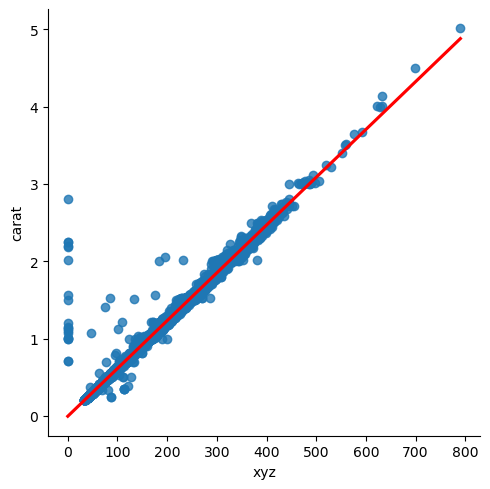

array([ 38.20203 ,  34.505856,  38.076885, ..., 114.126912, 118.110175,
       140.76612 ])

In [167]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import seaborn as sns

# Load the "diamonds" dataset
df = sns.load_dataset('diamonds')
# Create the new feature "xyz" as the product of "x", "y", and "z" columns
df['xyz'] = df['x'] * df['y'] * df['z']
# Drop categorical data columns
df = df.drop(columns=['cut', 'color', 'clarity'])
# Move "price" column to the front
price_col = df.pop('price')
df.insert(0, 'price', price_col)
#Removing the two lower obvious outliers
df = df[df['xyz'] <= 800]

# Create scatterplot with line of best fit and equation
sns.lmplot(x='xyz', y='carat', data=df, line_kws={'color': 'red'})

# Display the plot
plt.show()

df['xyz'].unique()

The distribution of xyz seems to go all the way down to 0 mm^3 and up to around 800 mm^3

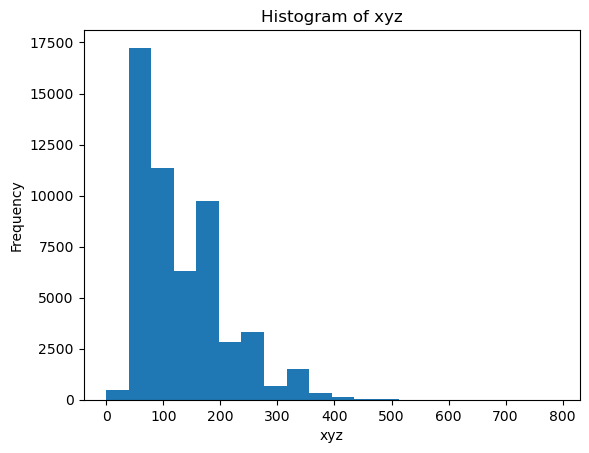

In [141]:

# Plot histogram of "xyz"
plt.hist(df['xyz'], bins=20)
plt.xlabel('xyz')
plt.ylabel('Frequency')
plt.title('Histogram of xyz')
plt.show()

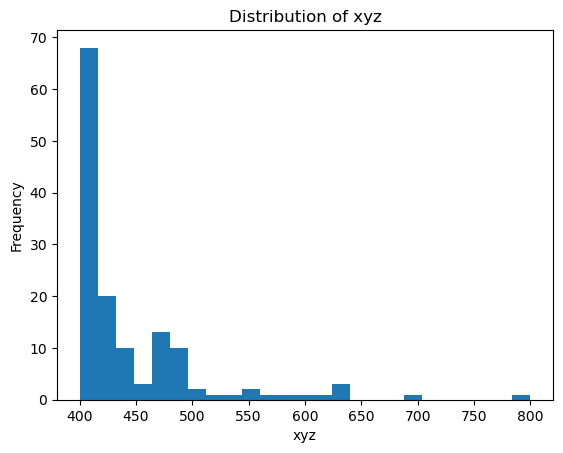

'Genuine data that we will keep'

In [142]:
# Create histogram of "xyz" column in sparse > 400 region
plt.hist(df['xyz'], bins=25, range=[400,800])

# Add labels and title
plt.xlabel('xyz')
plt.ylabel('Frequency')
plt.title('Distribution of xyz')

# Display the plot
plt.show()

"""Genuine data that we will keep"""

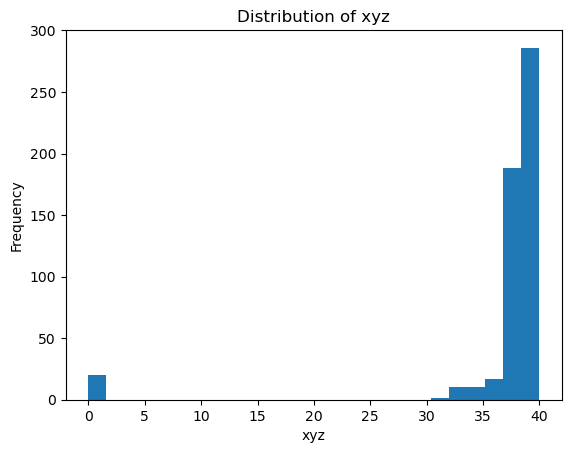

'The 0 values are erros in recording as no dimension can be zero'

In [143]:
# Create histogram of "xyz" column with range limited to 0-25
plt.hist(df['xyz'], bins=25, range=[0,40])

# Add labels and title
plt.xlabel('xyz')
plt.ylabel('Frequency')
plt.title('Distribution of xyz')

# Display the plot
plt.show()

"""The 0 values are erros in recording as no dimension can be zero"""

In [144]:
count_zeros = (df['xyz'] == 0).sum()
print('Number of 0 values in "xyz" column:', count_zeros)

Number of 0 values in "xyz" column: 20


In [136]:
count_x_zeros = (df['x'] == 0).sum()
count_y_zeros = (df['y'] == 0).sum()
count_z_zeros = (df['z'] == 0).sum()
print('Number of 0 values in "x" column:', count_x_zeros)
print('Number of 0 values in "y" column:', count_y_zeros)
print('Number of 0 values in "z" column:', count_z_zeros)

Number of 0 values in "x" column: 8
Number of 0 values in "y" column: 7
Number of 0 values in "z" column: 20


The 20 zero z values overlap with the 8 zero xs and 7 zero ys and all  20 are easily removed with >0

Minimum xyz of dirty data is 0.0
Maximum xyz  of dirty data is: 3840.5980600000003
Minimum xyz after outlier and nulls  filter is applied is 31.707984
Maximum xyz after outlier and nulls filter is applied is: 790.133208


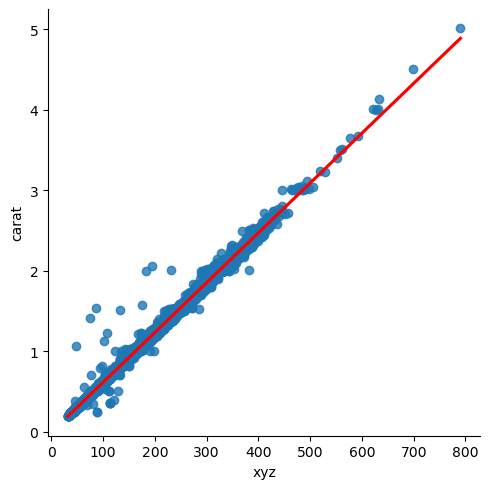

In [153]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import seaborn as sns

# Load the "diamonds" dataset
df = sns.load_dataset('diamonds')
# Create the new feature "xyz" as the product of "x", "y", and "z" columns
df['xyz'] = df['x'] * df['y'] * df['z']
# Drop categorical data columns
df = df.drop(columns=['cut', 'color', 'clarity'])
# Move "price" column to the front
price_col = df.pop('price')
df.insert(0, 'price', price_col)


print("Minimum xyz of dirty data is", df['xyz'].min())
print("Maximum xyz  of dirty data is:", df['xyz'].max())




#Filters out the values in the 'xyz' column that are greater than 800 or less than or equal to 1. 


df = df[(df['xyz'] <= 800) & (df['xyz'] > 0)]

print("Minimum xyz after outlier and nulls  filter is applied is", df['xyz'].min())
print("Maximum xyz after outlier and nulls filter is applied is:", df['xyz'].max())


# Create scatterplot with line of best fit and equation
sns.lmplot(x='xyz', y='carat', data=df, line_kws={'color': 'red'})

# Display the plot
plt.show()

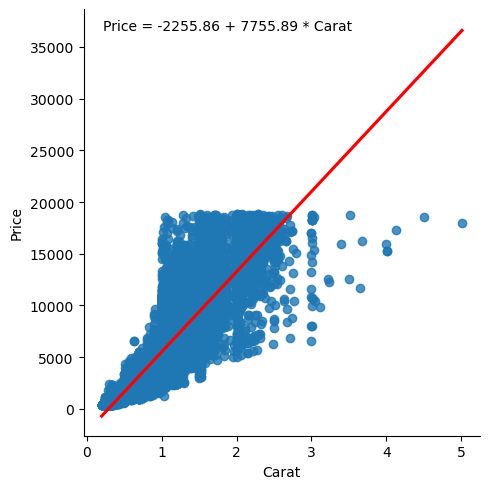

In [156]:


# Create scatterplot with line of best fit and equation
sns.lmplot(x='carat', y='price', data=df, line_kws={'color': 'red'})
plt.xlabel('Carat')
plt.ylabel('Price')

# Calculate the coefficients of the line of best fit
coiff, c = np.polyfit(df['carat'], df['price'], 1)

# Add the equation to the plot
plt.text(0.05, 0.95, f'Price = {c:.2f} + {coiff:.2f} * Carat', transform=plt.gca().transAxes)

# Display the plot
plt.show()


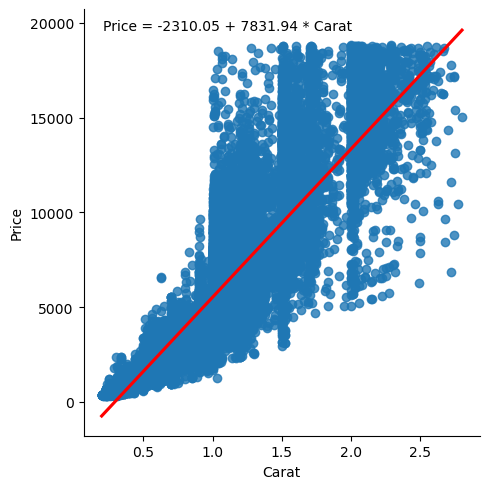

In [157]:
df = df[df['carat'] < 3]

# Create scatterplot with line of best fit and equation
sns.lmplot(x='carat', y='price', data=df, line_kws={'color': 'red'})
plt.xlabel('Carat')
plt.ylabel('Price')

# Calculate the coefficients of the line of best fit
coiff, c = np.polyfit(df['carat'], df['price'], 1)

# Add the equation to the plot
plt.text(0.05, 0.95, f'Price = {c:.2f} + {coiff:.2f} * Carat', transform=plt.gca().transAxes)

# Display the plot
plt.show()

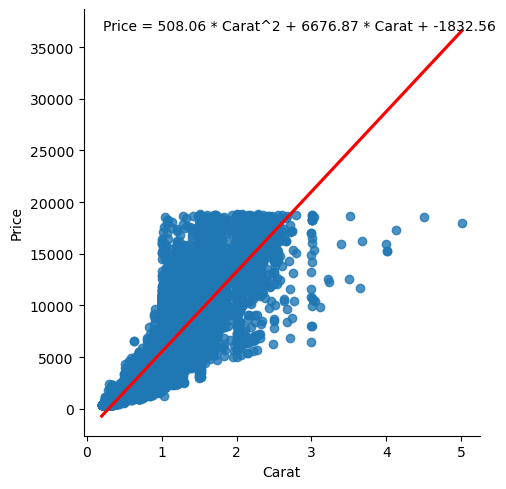

In [169]:
# Create scatterplot with line of best fit and equation
sns.lmplot(x='carat', y='price', data=df, line_kws={'color': 'red'})
plt.xlabel('Carat')
plt.ylabel('Price')

# Calculate the coefficients of the quadratic line of best fit
a, b, c = np.polyfit(df['carat'], df['price'], 2)

# Add the equation to the plot
plt.text(0.05, 0.95, f'Price = {a:.2f} * Carat^2 + {b:.2f} * Carat + {c:.2f}', transform=plt.gca().transAxes)

# Display the plot
plt.show()

1 carat or 200 gn of diamond is worth $7832 and the negative intercept suggests linear model is not good for low carat values

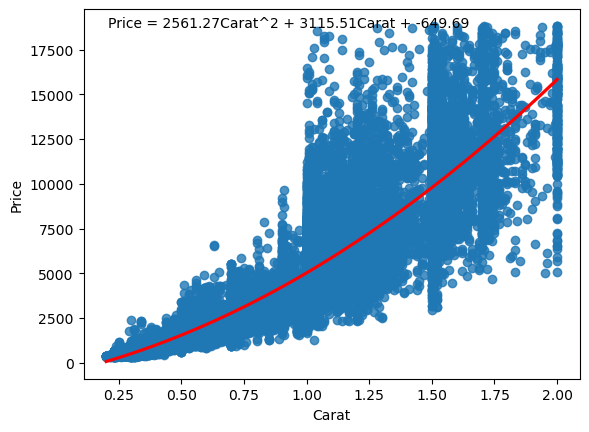

In [170]:
# Filter the dataset to carats less than or equal to 2
df = df[df['carat'] <= 2]

# Create scatterplot with quadratic line of best fit and equation
sns.regplot(x='carat', y='price', data=df, order=2, line_kws={'color': 'red'})
plt.xlabel('Carat')
plt.ylabel('Price')

# Calculate the coefficients of the quadratic line of best fit
coefs = np.polyfit(df['carat'], df['price'], 2)
c = coefs[2]
a = coefs[0]
b = coefs[1]

# Add the equation to the plot
plt.text(0.05, 0.95, f'Price = {a:.2f}Carat^2 + {b:.2f}Carat + {c:.2f}', transform=plt.gca().transAxes)

# Display the plot
plt.show()

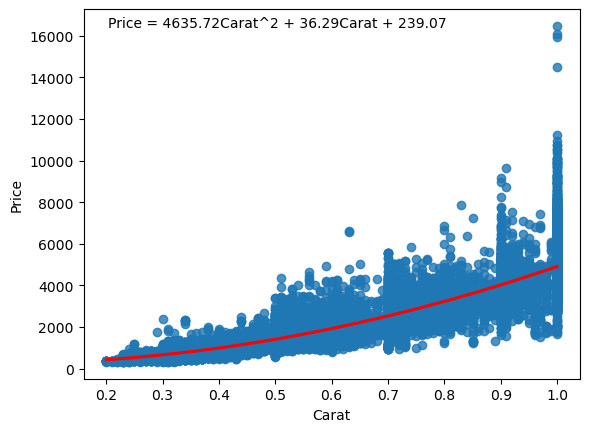

In [171]:
# Filter the dataset to carats less than or equal to 2
df = df[df['carat'] <= 1]

# Create scatterplot with quadratic line of best fit and equation
sns.regplot(x='carat', y='price', data=df, order=2, line_kws={'color': 'red'})
plt.xlabel('Carat')
plt.ylabel('Price')

# Calculate the coefficients of the quadratic line of best fit
coefs = np.polyfit(df['carat'], df['price'], 2)
c = coefs[2]
a = coefs[0]
b = coefs[1]

# Add the equation to the plot
plt.text(0.05, 0.95, f'Price = {a:.2f}Carat^2 + {b:.2f}Carat + {c:.2f}', transform=plt.gca().transAxes)

# Display the plot
plt.show()

To force the constant to zero in the quadratic model, you can use the numpy.polyfit function and set the full parameter to True. This will return the coefficients of the polynomial as the first element of the output tuple, and some additional information as the second element. You can then extract the coefficients and create a quadratic equation with a zero constant term.

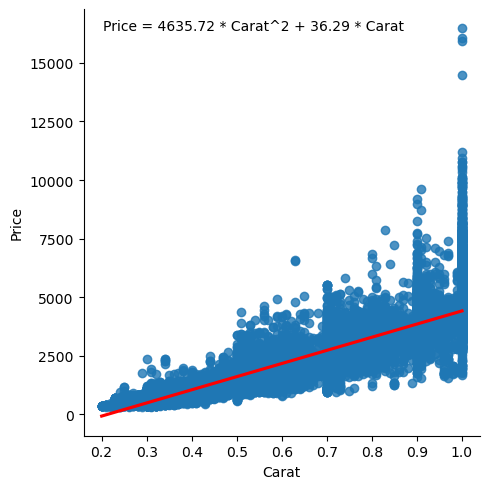

In [173]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Filter the data to include only diamonds below 2 carats
df = df[df['carat'] <= 3]

# Create scatterplot with line of best fit and equation
sns.lmplot(x='carat', y='price', data=df, line_kws={'color': 'red'})
plt.xlabel('Carat')
plt.ylabel('Price')

# Fit a quadratic model with zero constant term
x = df['carat']
y = df['price']
coeffs = np.polyfit(x, y, 2, full=True)[0]
coiff, c = coeffs[0], coeffs[1]

# Add the equation to the plot
plt.text(0.05, 0.95, f'Price = {coiff:.2f} * Carat^2 + {c:.2f} * Carat', transform=plt.gca().transAxes)

# Display the plot
plt.show()

In [2]:

import seaborn as sns
# List built-in seaborn datasets
datasets = sns.get_dataset_names()
print(datasets)

# Load each dataset into a separate variable of the same name, and create a series of column names
for dataset in datasets:
    df_name = f"{dataset}_df"
    col_name = f"{dataset}_col"
    globals()[df_name] = sns.load_dataset(dataset)
    globals()[col_name] = globals()[df_name].columns

print(datasets)

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']
['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


# Loop through the datasets and print column headers in turn
for dataset in datasets:
    col_name = f"{dataset}_col"
    print(f"Columns in {dataset}: {', '.join(globals()[col_name])}")

The "car_crashes" dataset contains data on car crashes in the United States. The columns in this dataset are:

total: the total number of car crashes in a given state
speeding: the number of car crashes caused by speeding in a given state
alcohol: the number of car crashes caused by driving under the influence of alcohol in a given state
not_distracted: the number of car crashes caused by drivers who were not distracted in a given state
no_previous: the number of car crashes caused by drivers with no previous accidents in a given state
ins_premium: the car insurance premium per insured car-year in a given state
ins_losses: the losses incurred by the car insurance companies per insured vehicle in a given state
abbrev: the abbreviation of the state name.

# Now adapt this code to one of the following three datasets


##  healthexp


Columns in healthexp: Year: year of health expenditure, Country: country name, Spending_USD: health expenditure in US dollars, Life_Expectancy: life expectancy.

## mpg

Columns in mpg: mpg: miles per gallon, cylinders: number of cylinders, displacement: engine displacement in cubic inches, horsepower: horsepower, weight: weight in pounds, acceleration: acceleration rate, model_year: year of the model, origin: country of origin, name: name of the model.

## car_crashes

Columns in car_crashes: total: total number of car crashes, speeding: number of car crashes due to speeding, alcohol: number of car crashes due to alcohol, not_distracted: number of car crashes not caused by distracted driving, no_previous: number of car crashes by drivers with no previous car crashes, ins_premium: insurance premium, ins_losses: total insurance losses, abbrev: state abbreviation.

In [9]:
# df.head()
# df.tail()
# df.shape
# df.columns
# df.index
# df.dtypes
# df.describe()
# df.info()
# df.isnull()
# df.dropna()
# df.fillna()
# df.groupby()
# df.apply()
# df.merge()
# df.join()
# df.pivot()
# df.stack()
# df.unstack()
# df.sort_values()
# df.sort_index()
# df.select_dtypes()
# df.loc[]
# df.iloc[]
# df.at[]
# df.iat[]
# df.copy()
# DataFrame columns:

# df[col1]
# df[col1].unique()
# df[col1].value_counts()
# df[col1].isnull()
# df[col1].dropna()
# df[col1].fillna()
# df[col1].groupby()
# df[col1].apply()
# df[col1].sort_values()
# df[col1].sort_index()

# Matplotlib:

# plt.plot()
# plt.scatter()
# plt.bar()
# plt.hist()
# plt.boxplot()
# plt.pie()
# plt.imshow()
# plt.colorbar()
# plt.legend()
# plt.title()
# plt.xlabel()
# plt.ylabel()
# plt.xlim()
# plt.ylim()
# plt.xticks()
# plt.yticks()
# plt.grid()
# plt.savefig()
# plt.show()
# Pandas DataFrame:

In [10]:

# # Seaborn functions
# sns.catplot()
# sns.clustermap()
# sns.cubehelix_palette()
# sns.despine()
# sns.distplot()
# sns.diverging_palette()
# sns.FacetGrid()
# sns.heatmap()
# sns.histplot()
# sns.hue_palette()
# sns.implot()
# sns.jointplot()
# sns.kdeplot()
# sns.lineplot()
# sns.load_dataset()
# sns.lmplot()
# sns.pairplot()
# sns.palplot()
# sns.pairgrid()
# sns.plotting_context()
# sns.pointplot()
# sns.regplot()
# sns.relplot()
# sns.reset_defaults()
# sns.rugplot()
# sns.scatterplot()
# sns.set()
# sns.set_color_codes()
# sns.set_palette()
# sns.set_style()
# sns.stripplot()
# sns.swarmplot()
# sns.violinplot()


In [ ]:
# Here are 30 popular pandas functions that are commonly used for data analysis:

import pandas as pd


# display the first n rows of a DataFrame
df.head()

# display the last n rows of a DataFrame
df.tail()

# return the number of rows and columns in a DataFrame
df.shape

# display a summary of the DataFrame, including data types and missing values
df.info()

# generate descriptive statistics for the DataFrame
df.describe()

# count the number of occurrences of each value in a column
df['price'].value_counts()

# group a DataFrame by one or more columns and perform operations on each group
df.groupby(['price']).mean()

# fill missing values in a DataFrame with a specified value or method
df.fillna(value=0)

# drop rows or columns with missing values from a DataFrame
df.dropna()

# sort a DataFrame by one or more columns
df.sort_values('price')

# merge two DataFrames on a common column or index
df.merge(other_df, on='price')

# create a pivot table from a DataFrame
pd.pivot_table(df, values='price', index=['column_name1', 'column_name2'], columns=['column_name3'])

# apply a function to each element of a DataFrame or a Series
df.apply(lambda x: x*2)

# map values of a Series to a new set of values
df['price'].map({'value1': 1, 'value2': 2})

# replace values in a DataFrame or a Series with another value
df.replace('old_value', 'new_value')

# return a list of unique values in a Series
df['xyz'].unique()

# identify duplicated rows in a DataFrame
df.duplicated()

# compute pairwise correlation of columns, excluding NA/null values
df.corr()

# create a plot from a DataFrame or


In [11]:
### pandas functions
# abs
# add
# add_prefix
# add_suffix
# agg
# aggregate
# align
# all
# any
# append
# apply
# applymap
# argmax
# argmin
# argsort
# asfreq
# asof
# assign
# astype
# at
# at_time
# attrs
# axes
# backfill
# between
# between_time
# bfill
# bool
# boxplot
# broadcast
# cat
# clip
# clip_lower
# clip_upper
# columns
# combine
# combine_first
# compare
# compound
# concat
# contains
# corr
# corrwith
# count
# cov
# cummax
# cummin
# cumprod
# cumsum
# cut
# describe
# diff
# div
# divide
# dot
# drop
# drop_duplicates
# dropna
# dt
# duplicated
# empty
# eq
# equals
# eval
# ewm
# expanding
# explode
# ffill
# fillna
# filter
# first
# first_valid_index
# floordiv
# ge
# get
# get_dtype_counts
# get_ftype_counts
# get_value
# get_values
# groupby
# gt
# head
# hist
# idxmax
# idxmin
# iloc
# index
# infer_objects
# info
# insert
# interpolate
# is_monotonic
# is_monotonic_decreasing
# is_monotonic_increasing
# is_unique
# isin
# isna
# items
# iteritems
# iterrows
# itertuples
# join
# keys
# kurt
# kurtosis
# last
# last_valid_index
# le
# loc
# lookup
# mad
# mask
# max
# mean
# median
# melt
# memory_usage
# merge
# min
# mod
# mode
# mul
# multiply
# ndim
# ne
# nlargest
# notna
# notnull
# nsmallest
# nunique
# pct_change
# pipe
# pivot
# pivot_table
# plot
# pop
# pow
# prod
# product
# quantile
# radd
# rank
# rdiv
# reindex
# reindex_like
# rename
# rename_axis
# reorder_levels
# replace
# resample
# reset_index
# rfloordiv
# rmod
# rmul
# rolling
# round
# rpow
# rsub
# rtruediv
# sample
# select_dtypes
# sem
# set_axis
# set_index
# set_value
# shift
# size
# skew
# slice_shift
# sort_index
# sort_values
# sparse
# squeeze
# stack
# std
# sub
# subtract
# sum
# swapaxes
# swaplevel
# tail
# take
# to_clipboard
# to_csv
# to_dict
# to_excel
# to_feather
# to_gbq
# to_hdf
# to_html
# to_json
# to_latex
# to_markdown
# to_msgpack
# to_numpy
# to_panel
# to_parquet
# to_period
# to_pickle
# to_records
# to_sql
# to_stata
# to_string
# to_timestamp
# to_xarray
# transform
# transpose
# truediv
# truncate
# tshift
# tz_convert
# tz_localize
# unique
# unstack
# update
# value_counts
# values
# var
# where
# xs
# numpy commands
# np.abs()
# np.absolute()
# np.add()
# np.angles()
# np.append()
# np.arange()
# np.argmax()
# np.argmin()
# np.argsort()
# np.argwhere()
# np.around()
# np.array()
# np.array2string()
# np.array_equal()
# np.array_equiv()
# np.asarray()
# np.asanyarray()
# np.ascontiguousarray()
# np.asfarray()
# np.asfortranarray()
# np.asmatrix()
# np.asscalar()
# np.atleast_1d()
# np.atleast_2d()
# np.atleast_3d()
# np.average()
# np.bincount()
# np.bitwise_and()
# np.bitwise_not()
# np.bitwise_or()
# np.bitwise_xor()
# np.blackman()
# np.bmat()
# np.broadcast()
# np.broadcast_arrays()
# np.broadcast_to()
# np.busday_count()
# np.busday_offset()
# np.busdaycalendar()
# np.byte_bounds()
# np.bytes()
# np.byteswap()
# np.can_cast()
# np.cbrt()
# np.c_()
# np.cached_property()
# np.calm_warnings()
# np.cbrt()
# np.ceil()
# np.char.add()
# np.char.capitalize()
# np.char.center()
# np.char.count()
# np.char.decode()
# np.char.encode()
# np.char.endswith()
# np.char.equal()
# np.char.find()
# np.char.greater()
# np.char.greater_equal()
# np.char.join()
# np.char.less()
# np.char.less_equal()
# np.char.ljust()
# np.char.lower()
# np.char.lstrip()
# np.char.mod()
# np.char.multiply()
# np.char.partition()
# np.char.replace()
# np.char.rfind()
# np.char.rindex()
# np.char.rjust()
# np.char.rpartition()
# np.char.rsplit()
# np.char.rstrip()
# np.char.split()
# np.char.splitlines()
# np.char.startswith()
# np.char.strip()
# np.char.swapcase()
# np.char.title()
# np.char.translate()
# np.char.upper()
# np.char.zfill()
# np.choose()
# np.clip()
# np.column_stack()
# np.common_type()
# np.compare_chararrays()
# np.compress()
# np.concatenate()
# np.conj()
# np.conjugate()
# np.convolve()
# np.copy()
# np.copyto()
# np.correlate()
# np.cos()
# np.cosh()
# np.count_nonzero()
# np.cov()
# np.cross()